In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings

warnings.filterwarnings(action="ignore")
plt.rcParams["font.family"] = "AppleGothic"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
class PYKRX_INFO_PREPROCESSOR:
    def __init__(self, pykrx_info_df) -> None:
        self.pykrx_info_df = pykrx_info_df
        self.trader_df = self.preprocessing()

    def preprocessing(self):
        trader_df = self.pykrx_info_df.copy()
        trader_df = self.append_Corp(trader_df)
        trader_df = self.append_Foreign(trader_df)
        trader_df = self.append_Individual(trader_df)
        trader_df["Date"] = pd.to_datetime(trader_df["Date"])
        return trader_df

    @staticmethod
    def append_Corp(trader_df, corp_args=["금융투자", "투신", "사모"]):
        trader_df["Corp"] = trader_df.loc[:, corp_args].sum(axis=1)
        return trader_df

    @staticmethod
    def append_Foreign(trader_df, foreign_args=["외국인"]):
        trader_df["Foreign"] = trader_df.loc[:, foreign_args].sum(axis=1)
        return trader_df

    @staticmethod
    def append_Individual(trader_df, indivisual_args=["개인"]):
        trader_df["Individual"] = trader_df.loc[:, indivisual_args].sum(axis=1)
        return trader_df

    def get_main_trader_df(self, market="KOSPI"):
        self.args = ["Corp", "Foreign", "Individual"]
        trader_df = self.trader_df
        trader_market_df = trader_df[trader_df["Market"] == market].copy()
        main_columns = ["Date"] + self.args
        main_trader_df = trader_market_df.loc[:, main_columns]
        return main_trader_df

In [3]:
pykrx_info_df = pd.read_csv("./de/data/pykrx_info_df.csv", index_col=0)

In [4]:
pykrx_info_preprocessor = PYKRX_INFO_PREPROCESSOR(pykrx_info_df)

kospi_trader_df = pykrx_info_preprocessor.get_main_trader_df(market='KOSPI')
kosdaq_trader_df = pykrx_info_preprocessor.get_main_trader_df(market='KOSDAQ')

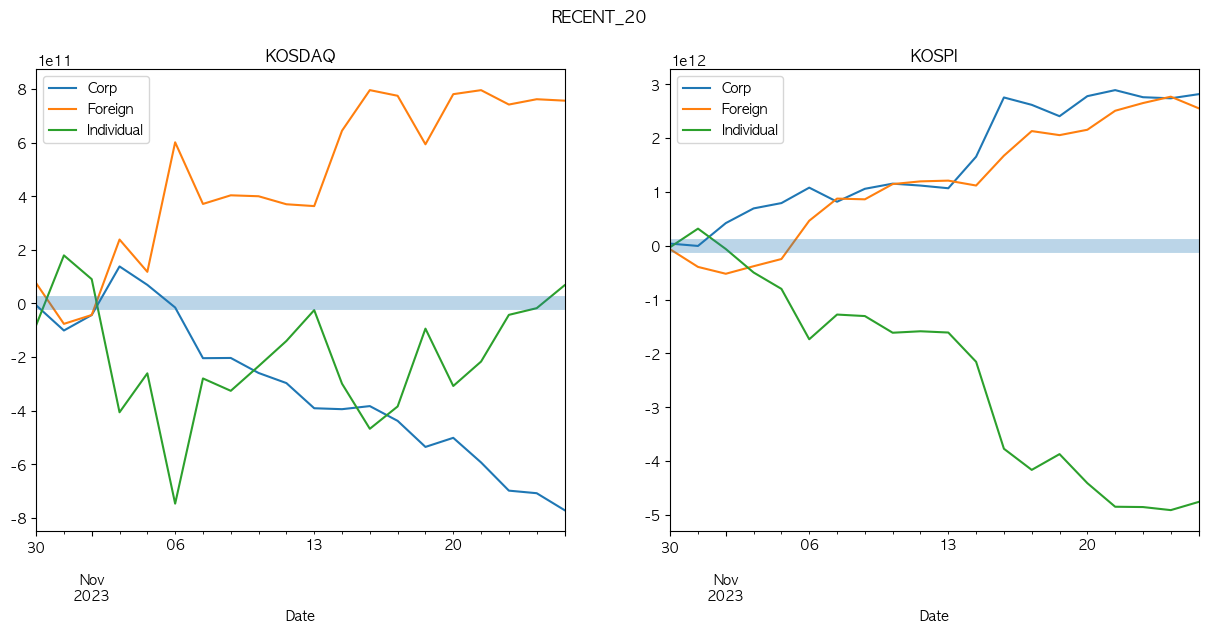

In [5]:
# Figure와 Axes 객체 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 첫 번째 subplot (좌측)
kosdaq_trader_df.set_index("Date").tail(20).cumsum().plot(ax=axs[0])
axs[0].axhline(0, linewidth=10, alpha=0.3)
axs[0].set_title("KOSDAQ")

# 두 번째 subplot (우측)
kospi_trader_df.set_index("Date").tail(20).cumsum().plot(ax=axs[1])
axs[1].axhline(0, linewidth=10, alpha=0.3)
axs[1].set_title("KOSPI")
plt.suptitle("RECENT_20")
plt.show()

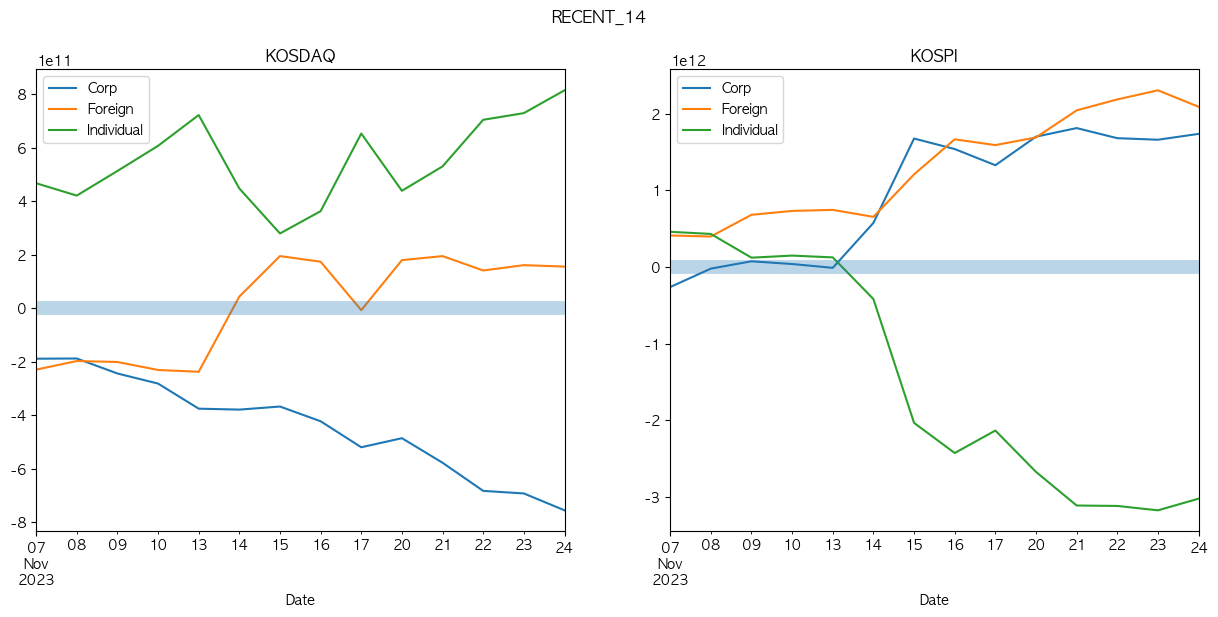

In [6]:
# Figure와 Axes 객체 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 첫 번째 subplot (좌측)
kosdaq_trader_df.set_index("Date").tail(14).cumsum().plot(ax=axs[0])
axs[0].axhline(0, linewidth=10, alpha=0.3)
axs[0].set_title("KOSDAQ")

# 두 번째 subplot (우측)
kospi_trader_df.set_index("Date").tail(14).cumsum().plot(ax=axs[1])
axs[1].axhline(0, linewidth=10, alpha=0.3)
axs[1].set_title("KOSPI")
plt.suptitle("RECENT_14")
plt.show()

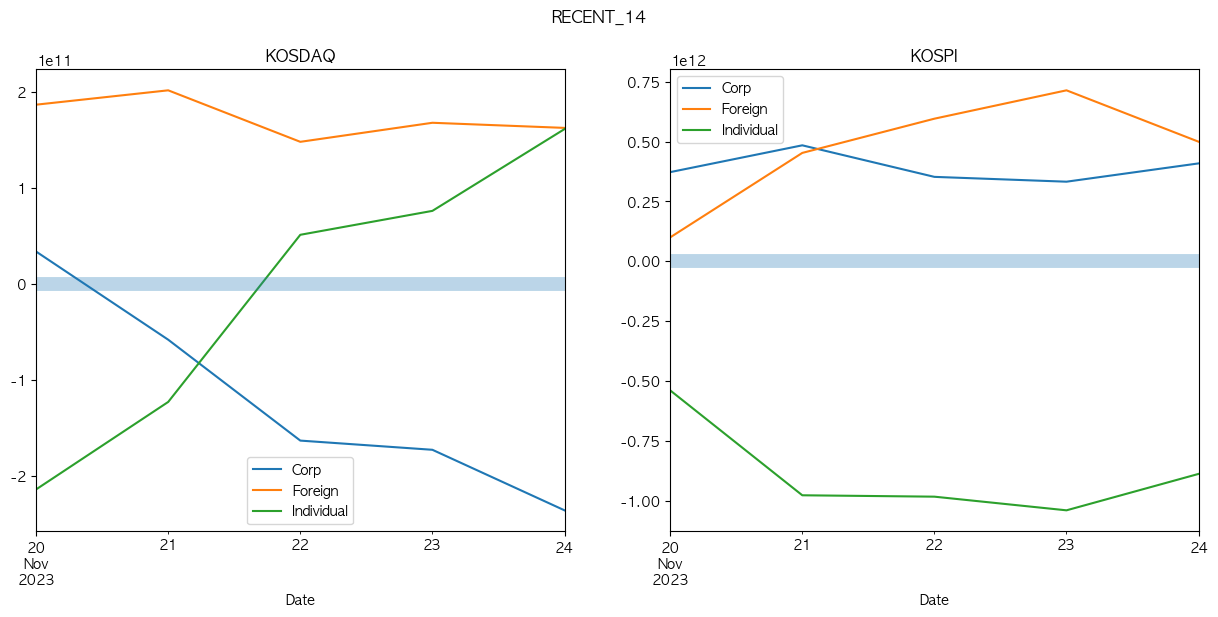

In [7]:
# Figure와 Axes 객체 생성
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# 첫 번째 subplot (좌측)
kosdaq_trader_df.set_index("Date").tail(5).cumsum().plot(ax=axs[0])
axs[0].axhline(0, linewidth=10, alpha=0.3)
axs[0].set_title("KOSDAQ")

# 두 번째 subplot (우측)
kospi_trader_df.set_index("Date").tail(5).cumsum().plot(ax=axs[1])
axs[1].axhline(0, linewidth=10, alpha=0.3)
axs[1].set_title("KOSPI")
plt.suptitle("RECENT_14")
plt.show()